In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('MovieReviewTrainingDatabase.csv')

In [4]:
df.head()

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...


In [5]:
df.describe()

,sentiment,review
count,25000,25000
unique,2,24904
top,Negative,You do realize that you've been watching the E...
freq,12500,3


In [6]:
df.groupby('sentiment').count()

,review
sentiment,
Negative,12500
Positive,12500


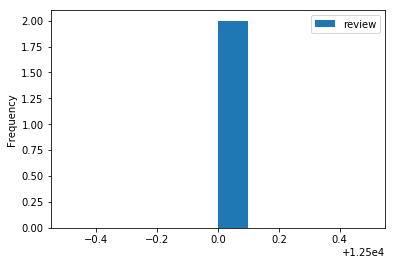

In [7]:
df.groupby('sentiment').count().plot.hist(by='sentiment')

In [8]:
df['review'].head()

0    With all this stuff going down at the moment w...
1    'The Classic War of the Worlds' by Timothy Hin...
2    The film starts with a manager (Nicholas Bell)...
3    It must be assumed that those who praised this...
4    Superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object

In [9]:
import string
from nltk.corpus import stopwords

    
    
    
    
    

In [10]:
def text_processor(message):
    nopunc=[c for c in message if c not in string.punctuation]
    nopunc="".join(nopunc)
    clean_mess=[word for word in nopunc.split() if word not in stopwords.words('english')]
    return(clean_mess)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
len(df['review'])

25000

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_processor).fit(df['review'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
messages_finale_vector=bow_transformer.transform(df['review'])

In [ ]:
tf_idf=TfidfTransformer.fit(messages_finale_vector)

In [ ]:
tf_idf_finale=tf_idf.transform(messages_finale_vector)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_line=Pipeline.fit([
                       ('Step 1',CountVectorizer(analyzer=text_processor),)
                       ('Step 2',TfidfTransformer() ),
                       ('Step 3',MultinomialNB())
                       ])
                       

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(rev_train,rev_test),(senti_train,senti_test)=train_test_split(df['review'],df['sentiment'])

In [ ]:
pipe_line.fit(rev_train,senti_train)

In [ ]:
predictions=pipe_line.predict(rev_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(predictions,senti_test))